<a href="https://colab.research.google.com/github/pkams/projetos_iniciais/blob/master/ClassifyingCatsvsDogswithCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=07fea0030550f24b3d0d5370f3fd8cb7080576f439c8f1aacdcdc447af34d29b
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [2]:
# Bibliotecas
import os
import zipfile
import wget
import random
from shutil import copyfile

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Carregando
url = "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip"
filename = wget.download(url)

In [4]:
# Extraindo

zip_ref = zipfile.ZipFile(filename, 'r')
zip_ref.extractall('c_and_d')
zip_ref.close()

In [5]:
# Verificando quantidade de exemplos em cada diretório
print(len(os.listdir('c_and_d/PetImages/Cat')))
print(len(os.listdir('c_and_d/PetImages/Dog')))

12501
12501


In [6]:
# Criando diretórios para treino e teste
# Eles serão povoados com as divisões que serão feitas

to_create = [
    'cats-v-dogs',
    'cats-v-dogs/training',
    'cats-v-dogs/testing',
    'cats-v-dogs/training/cats',
    'cats-v-dogs/training/dogs',
    'cats-v-dogs/testing/cats',
    'cats-v-dogs/testing/dogs'
]

for directory in to_create:
    try:
        os.mkdir(directory)
        print(directory, 'created')
    except:
        print(directory, 'failed')

cats-v-dogs created
cats-v-dogs/training created
cats-v-dogs/testing created
cats-v-dogs/training/cats created
cats-v-dogs/training/dogs created
cats-v-dogs/testing/cats created
cats-v-dogs/testing/dogs created


In [7]:
# Criando uma função que irá dividir os dados conforme entradas:
# SOURCE será a fonte dos dados
# TRAINING diretório onde será inserido os dados de treino
# TESTING diretório onde será inserido os dados de teste
# SPLIT_SIZE determina a porção em que serão divididos os dados
# Deverá ser randomizado, então pegaremos para teste os X% determinados
# e o resto irá pra teste.

# Obs:
# os.listdir(directory) -> Dá a lista do conteudo do diretório
# os.path.getsize(path) -> retorna tamanho do arquivo
# copyfile(source, destination) -> copia arquivo da fonte para destino
# random.sample(list, len(list)) -> randomiza uma lista

def split_data (SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    all_files = []
    
    # pegando cada nome dos arquivos da pasta e salvando em file_path
    for file_name in os.listdir(SOURCE):
        file_path = SOURCE + file_name
        
        # salvando os nomes a cada rodada do FOR, em lista
        if os.path.getsize(file_path):
            all_files.append(file_name)
        else:
            print('{} is zero length, so ignoring'.format(file_name))
            
    n_files = len(all_files) # pegando quantidade de arquivos total
    split_point = int(n_files*SPLIT_SIZE) # definindo quantidade de treino
    
    # Embaralhando TODOS os arquivos
    shuffled = random.sample(all_files, n_files)
    
    # Dividindo a lista de nomes em train e test set
    train_set = shuffled[:split_point]
    test_set = shuffled[split_point:]
    
    # Copiando arquivos do SOURCE para pasta de Train ou Test
    # formato: diretório1 (origem) -> diretório2 (destino)
    for file_name in train_set:
        copyfile(SOURCE+file_name, TRAINING+file_name)
    for file_name in test_set:
        copyfile(SOURCE+file_name, TESTING+file_name)    

In [8]:
# Definindo local dos arquivos
# Definindo split

CAT_SOURCE_DIR = r'c_and_d/PetImages/Cat/'
TRAINING_CATS_DIR = r"cats-v-dogs/training/cats/"
TESTING_CATS_DIR = r"cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = r"c_and_d/PetImages/Dog/"
TRAINING_DOGS_DIR = r"cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = r"cats-v-dogs/testing/dogs/"

split_size = .9

split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

666.jpg is zero length, so ignoring
11702.jpg is zero length, so ignoring


In [9]:
# Verificando quantidade de arquivos em cada pasta
print(len(os.listdir(TRAINING_CATS_DIR)))
print(len(os.listdir(TRAINING_DOGS_DIR)))
print(len(os.listdir(TESTING_CATS_DIR)))
print(len(os.listdir(TESTING_DOGS_DIR)))

11250
11250
1250
1250


In [49]:
# Criando modelo

model = tf.keras.models.Sequential([
    
    # Layers convolucionais
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    
    # Layers MLP
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 35, 35, 64)        8256      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 18496)            

In [51]:
# Criando data_generator para treino e validação
# Vai pegar os nomes das pastas criadas e usar como label 
# Neste caso vai ir em training e pegar CATS e DOGS como label

training_dir = 'cats-v-dogs/training'
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    training_dir, # diretório com pastas de treino
    batch_size=64, # lote
    class_mode='binary', # tipo de classificação
    target_size=(150,150) # formato desejado de todas imagens
)

validation_dir = 'cats-v-dogs/testing'
validation_datagen = ImageDataGenerator(rescale=1/255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir, # diretório com pastas de treino
    batch_size=64, # lote
    class_mode='binary', # tipo de classificação
    target_size=(150,150) # formato desejado de todas imagens
)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [54]:
import warnings
warnings.filterwarnings("ignore")

# Fitando modelo
history = model.fit(
    train_generator,
    epochs=15,
    verbose=1,
    steps_per_epoch=100,
    validation_data=validation_generator # usando os dados para validar
)

Epoch 1/15
100/100 [==============================] - 24s 243ms/step - loss: 0.4818 - accuracy: 0.7589 - val_loss: 0.4747 - val_accuracy: 0.7764
Epoch 2/15
100/100 [==============================] - 24s 243ms/step - loss: 0.4384 - accuracy: 0.8003 - val_loss: 0.4615 - val_accuracy: 0.7768
Epoch 3/15
100/100 [==============================] - 24s 242ms/step - loss: 0.4354 - accuracy: 0.7947 - val_loss: 0.4844 - val_accuracy: 0.7724
Epoch 4/15
100/100 [==============================] - 24s 242ms/step - loss: 0.4119 - accuracy: 0.8097 - val_loss: 0.4541 - val_accuracy: 0.7996
Epoch 5/15
100/100 [==============================] - 24s 242ms/step - loss: 0.3969 - accuracy: 0.8140 - val_loss: 0.5049 - val_accuracy: 0.7628
Epoch 6/15
100/100 [==============================] - 24s 242ms/step - loss: 0.3865 - accuracy: 0.8223 - val_loss: 0.4331 - val_accuracy: 0.8068
Epoch 7/15
100/100 [==============================] - 24s 241ms/step - loss: 0.3554 - accuracy: 0.8438 - val_loss: 0.4012 - val_ac

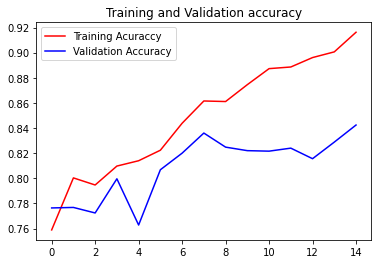

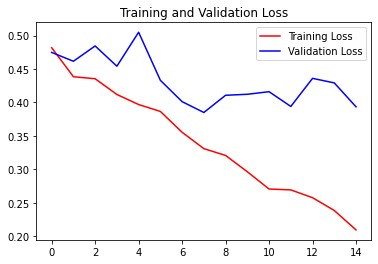

In [55]:
# plotando o andamento do treino
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# dados do treino
acc = history.history['accuracy']
loss = history.history['loss']

# dados da validação
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Quantidade de épocas
epochs = range(len(acc))

# Plotando acurácia
plt.plot(epochs, acc, 'r', label='Training Acuraccy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

# Plotando perdas (loss)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [58]:
# Teste "for fun":
# Testando o classificador

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload() # uploade de imagem

for fn in uploaded.keys(): 
  # classificando
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150,150)) # igual ao treinado
  x = image.img_to_array(img) # transforma em array
  x = np.expand_dims (x, axis=0) # transforma em formato (1,150,150,3)

  images = np.vstack([x]) # transforma em array de 1D
  classes = model.predict(images, batch_size=10)
  print(classes[0]) # printando chance
  if classes[0] > 0.5:
    print(fn+' is a dog')
  else:
    print(fn+' is a cat')

Saving gato1.jpg to gato1 (1).jpg
[0.]
gato1.jpg is a cat
